In [8]:
import pickle
import os
from pathlib import Path

In [5]:
cd ../test_data

/home/raghavendragaleppa/Desktop/RaghavendraGaleppa2019/ThinkChipBackend/ThinkChipBackend/test_data


In [6]:
pwd

'/home/raghavendragaleppa/Desktop/RaghavendraGaleppa2019/ThinkChipBackend/ThinkChipBackend/test_data'

In [11]:
eyes_closed = os.listdir('raghav_eyes_closed/')
work = os.listdir('raghav_work/')
print(list(enumerate(eyes_closed)))
print(list(enumerate(work)))

[(0, 'README.md'), (1, '[f]raghav_eyes_closed_2|111019_122051.pickle'), (2, '[f]eyes_closed|141019_160513.pickle'), (3, '[f]raghavendra_eyes_closed|151019_162800.pickle'), (4, '[f]raghav_eyes_closed_3|111019_122407.pickle'), (5, '[f]raghav_eyes_closed_1|111019_121756.pickle')]
[(0, '[f]assignment|141019_190516.pickle'), (1, '[f]reading_research_paper_1|111019_145415.pickle'), (2, '[f]reading_research_paper_1|111019_150922.pickle'), (3, '[f]ragavendra_attention|171019_133116.pickle')]


In [12]:
# Eyes Closed Data
eyes_closed_data = []
work_data = []
eyes_closed_folder = Path('raghav_eyes_closed/')
work_folder = Path('raghav_work/')

# Loading Eyes closed data
for filename in eyes_closed:
    if 'pickle' in filename:
        with open(eyes_closed_folder/filename, 'rb') as f:
            eyes_closed_data.append(pickle.load(f))

# Loading work data
for filename in work:
    if 'pickle' in filename:
        with open(work_folder/filename, 'rb') as f:
            work_data.append(pickle.load(f))
            
print(f"Lenght of eyes_closed: {len(eyes_closed)}")
print(f"Lenght of work: {len(work)}")

Lenght of eyes_closed: 6
Lenght of work: 4


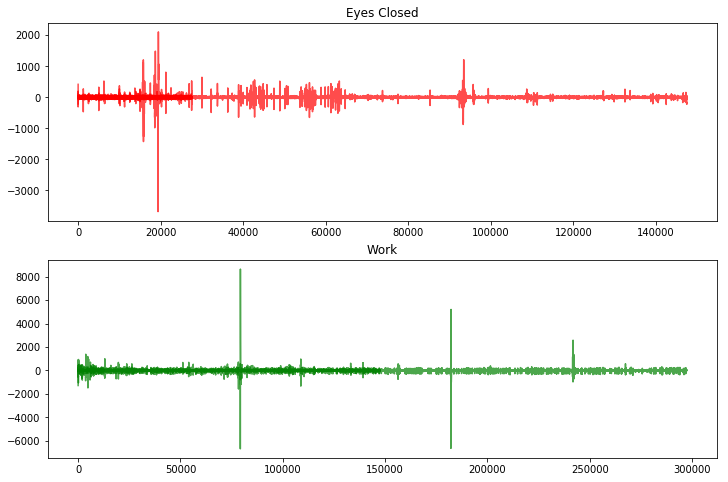

In [13]:
# Plot the filtered (DC and 50Hz notch) data without removing bad epochs
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(2,1, figsize=(12,8))

for dt in eyes_closed_data:
    ax[0].plot(dt[10:,0,:].reshape(-1),c='r', alpha=0.7)
    ax[0].set_title('Eyes Closed')

for dt in work_data:
    ax[1].plot(dt[10:,0,:].reshape(-1),c='g', alpha=0.7)
    ax[1].set_title('Work')

In [14]:
import sys
sys.path.append('../')

In [15]:
from features import feature_removal as fr

Using config.dataReader - random number


In [18]:
# Removing bad epochs containing eye blinks
import config
config.reset_filter_states() # Why do we need to reset filter states?

eyes_closed_data_clean = []
work_data_clean = []

print("Removing bad epochs from eyes closed data")
for i, dt in enumerate(eyes_closed_data):
    config.reset_filter_states()
    eyes_closed_data_clean.append(fr.remove_bad_epochs(dt,fr.energy_of_epoch,threshold=100))
    
print("Removing bad epochs from work data")
for i, dt in enumerate(work_data):
    config.reset_filter_states()
    work_data_clean.append(fr.remove_bad_epochs(dt,fr.energy_of_epoch,threshold=100))


Removing bad epochs from eyes closed data
CONSOLE: ENEGERGY: 2109006.1879704227
CONSOLE: ENEGERGY: 338133.2121041954
CONSOLE: ENEGERGY: 50301.462974235365
CONSOLE: ENEGERGY: 3374.307708438417
CONSOLE: ENEGERGY: 160.6919686475319
CONSOLE: ENEGERGY: 295.1607570872093
CONSOLE: ENEGERGY: 58.434129953832105
CONSOLE: ENEGERGY: 37.96875360173501
CONSOLE: ENEGERGY: 55.30768406650847
CONSOLE: ENEGERGY: 50.683545234126385
CONSOLE: ENEGERGY: 93.33736523392646
CONSOLE: ENEGERGY: 58.80169400013732
CONSOLE: ENEGERGY: 53.226655151318425
CONSOLE: ENEGERGY: 22.116258757915496
CONSOLE: ENEGERGY: 58.51553123979649
CONSOLE: ENEGERGY: 68.96177881017391
CONSOLE: ENEGERGY: 113.02679458537611
CONSOLE: ENEGERGY: 47.11534716459745
CONSOLE: ENEGERGY: 37.95860231788809
CONSOLE: ENEGERGY: 45.551666995556005
CONSOLE: ENEGERGY: 32.28642567745564
CONSOLE: ENEGERGY: 48.11701544380208
CONSOLE: ENEGERGY: 38.523836895676574
CONSOLE: ENEGERGY: 16.948635832764857
CONSOLE: ENEGERGY: 5.166273824727363
CONSOLE: ENEGERGY: 28.6

CONSOLE: ENEGERGY: 8082491.410735076
CONSOLE: ENEGERGY: 1153525.6103026504
CONSOLE: ENEGERGY: 88185.43468963858
CONSOLE: ENEGERGY: 8053.278312572166
CONSOLE: ENEGERGY: 414.36167468276386
CONSOLE: ENEGERGY: 209.43099614105333
CONSOLE: ENEGERGY: 269.8868924731212
CONSOLE: ENEGERGY: 33.79147863596153
CONSOLE: ENEGERGY: 1399.1541389443646
CONSOLE: ENEGERGY: 4658.359292125154
CONSOLE: ENEGERGY: 18427.12073278502
CONSOLE: ENEGERGY: 9289.876820120144
CONSOLE: ENEGERGY: 100725.92655311596
CONSOLE: ENEGERGY: 45424.077682730735
CONSOLE: ENEGERGY: 13772.158424140054
CONSOLE: ENEGERGY: 915.7545040900033
CONSOLE: ENEGERGY: 126.97862023468112
CONSOLE: ENEGERGY: 140.1504044589929
CONSOLE: ENEGERGY: 52.60799962103191
CONSOLE: ENEGERGY: 47.10244706803573
CONSOLE: ENEGERGY: 27.64522809885479
CONSOLE: ENEGERGY: 53.059590689924036
CONSOLE: ENEGERGY: 16.370007575040137
CONSOLE: ENEGERGY: 54.94565433734494
CONSOLE: ENEGERGY: 45.509840124593254
CONSOLE: ENEGERGY: 46.39406170359635
CONSOLE: ENEGERGY: 55.81734

CONSOLE: ENEGERGY: 567130.7418605998
CONSOLE: ENEGERGY: 178562.2716238782
CONSOLE: ENEGERGY: 17809.58800911033
CONSOLE: ENEGERGY: 2505.967339287189
CONSOLE: ENEGERGY: 359.27763264095876
CONSOLE: ENEGERGY: 79.13961524748025
CONSOLE: ENEGERGY: 94.01894279915423
CONSOLE: ENEGERGY: 95.26160557581025
CONSOLE: ENEGERGY: 197.12022310224688
CONSOLE: ENEGERGY: 719.859629365505
CONSOLE: ENEGERGY: 363.2807918976272
CONSOLE: ENEGERGY: 89.99931018831023
CONSOLE: ENEGERGY: 27.186489130951486
CONSOLE: ENEGERGY: 85.9134924449071
CONSOLE: ENEGERGY: 47.496437382772015
CONSOLE: ENEGERGY: 25.85162881741145
CONSOLE: ENEGERGY: 30.340737060457446
CONSOLE: ENEGERGY: 53.628721773223994
CONSOLE: ENEGERGY: 92.39518402850823
CONSOLE: ENEGERGY: 51.25582419324685
CONSOLE: ENEGERGY: 16.579087359057695
CONSOLE: ENEGERGY: 27.134845458611267
CONSOLE: ENEGERGY: 75.34921076713097
CONSOLE: ENEGERGY: 44.893235669246835
CONSOLE: ENEGERGY: 30.076675311772508
CONSOLE: ENEGERGY: 20.783695476597067
CONSOLE: ENEGERGY: 13.7918233

CONSOLE: ENEGERGY: 661.5765979676052
CONSOLE: ENEGERGY: 262.0019574365215
CONSOLE: ENEGERGY: 16.73710603088275
CONSOLE: ENEGERGY: 28.47656934930417
CONSOLE: ENEGERGY: 17.78901478754381
CONSOLE: ENEGERGY: 9.879432880452669
CONSOLE: ENEGERGY: 25.94457105020284
CONSOLE: ENEGERGY: 33.808104840023255
CONSOLE: ENEGERGY: 20.933059545606238
CONSOLE: ENEGERGY: 23.118784603132266
CONSOLE: ENEGERGY: 11.499419576145316
CONSOLE: ENEGERGY: 8.541663843864992
CONSOLE: ENEGERGY: 7.478883562951727
CONSOLE: ENEGERGY: 45.88287759953548
CONSOLE: ENEGERGY: 21.325192839505224
CONSOLE: ENEGERGY: 20.836548194094323
CONSOLE: ENEGERGY: 20.087277524595432
CONSOLE: ENEGERGY: 16.858117630986055
CONSOLE: ENEGERGY: 23.198405975343622
CONSOLE: ENEGERGY: 25.66558849090876
CONSOLE: ENEGERGY: 19.308935385039515
CONSOLE: ENEGERGY: 136.00458967648095
CONSOLE: ENEGERGY: 27.37221031200158
CONSOLE: ENEGERGY: 24.492735771831896
CONSOLE: ENEGERGY: 136.0769976851231
CONSOLE: ENEGERGY: 41.71062062855504
CONSOLE: ENEGERGY: 20.2536

CONSOLE: ENEGERGY: 2792035.8339777766
CONSOLE: ENEGERGY: 414645.4294874368
CONSOLE: ENEGERGY: 54107.87346561696
CONSOLE: ENEGERGY: 5324.80363927746
CONSOLE: ENEGERGY: 813.769007722804
CONSOLE: ENEGERGY: 1224.127621655088
CONSOLE: ENEGERGY: 1830.370997570452
CONSOLE: ENEGERGY: 361.8052540061724
CONSOLE: ENEGERGY: 87.66429265656728
CONSOLE: ENEGERGY: 53.42539777587944
CONSOLE: ENEGERGY: 39.74758646741749
CONSOLE: ENEGERGY: 92.64413558914222
CONSOLE: ENEGERGY: 93.42733734627507
CONSOLE: ENEGERGY: 52.301603770251354
CONSOLE: ENEGERGY: 37.92312310333671
CONSOLE: ENEGERGY: 35.10500845211698
CONSOLE: ENEGERGY: 52.983931716409046
CONSOLE: ENEGERGY: 80.0160183342295
CONSOLE: ENEGERGY: 69.56712005612124
CONSOLE: ENEGERGY: 36.23822724037287
CONSOLE: ENEGERGY: 98.47713486473623
CONSOLE: ENEGERGY: 39.719363971159694
CONSOLE: ENEGERGY: 31.87752883213476
CONSOLE: ENEGERGY: 36.00677834417468
CONSOLE: ENEGERGY: 13.939020929241117
CONSOLE: ENEGERGY: 67.74471111117515
CONSOLE: ENEGERGY: 11.79478712606407

CONSOLE: ENEGERGY: 3236909.8177441377
CONSOLE: ENEGERGY: 567890.3110326668
CONSOLE: ENEGERGY: 38421.79279411168
CONSOLE: ENEGERGY: 2210.614948437511
CONSOLE: ENEGERGY: 326.63796899926916
CONSOLE: ENEGERGY: 103.71427612230487
CONSOLE: ENEGERGY: 450.9731283566797
CONSOLE: ENEGERGY: 1012.9617990680413
CONSOLE: ENEGERGY: 800.9910551042224
CONSOLE: ENEGERGY: 596.3368461447209
CONSOLE: ENEGERGY: 493.7323713228564
CONSOLE: ENEGERGY: 198.3476805904218
CONSOLE: ENEGERGY: 112.6973657401887
CONSOLE: ENEGERGY: 60.35251197219049
CONSOLE: ENEGERGY: 51.623967377599975
CONSOLE: ENEGERGY: 37.47144244668058
CONSOLE: ENEGERGY: 96.90181978036459
CONSOLE: ENEGERGY: 71.96024450927885
CONSOLE: ENEGERGY: 50.56270745173785
CONSOLE: ENEGERGY: 47.18004417478345
CONSOLE: ENEGERGY: 25.75433357437895
CONSOLE: ENEGERGY: 84.09171018023079
CONSOLE: ENEGERGY: 154.13774250705453
CONSOLE: ENEGERGY: 51.44486973467827
CONSOLE: ENEGERGY: 16.11580241561119
CONSOLE: ENEGERGY: 15.088209954145084
CONSOLE: ENEGERGY: 36.344476948

CONSOLE: ENEGERGY: 629395.9691791787
CONSOLE: ENEGERGY: 232400.11382239225
CONSOLE: ENEGERGY: 148906.3797423863
CONSOLE: ENEGERGY: 28821.10406496098
CONSOLE: ENEGERGY: 27873.704482290446
CONSOLE: ENEGERGY: 475618.48426325666
CONSOLE: ENEGERGY: 35443.39123279185
CONSOLE: ENEGERGY: 35605.08725771282
CONSOLE: ENEGERGY: 342910.9672065742
CONSOLE: ENEGERGY: 78589.11517951394
CONSOLE: ENEGERGY: 31820.955303718005
CONSOLE: ENEGERGY: 79533.23103446429
CONSOLE: ENEGERGY: 87045.6218153912
CONSOLE: ENEGERGY: 84073.10583489464
CONSOLE: ENEGERGY: 37755.36428553103
CONSOLE: ENEGERGY: 20529.557093180447
CONSOLE: ENEGERGY: 29649.837027137928
CONSOLE: ENEGERGY: 27536.669307781984
CONSOLE: ENEGERGY: 3267.477933246628
CONSOLE: ENEGERGY: 8129.426711566984
CONSOLE: ENEGERGY: 17877.323165754988
CONSOLE: ENEGERGY: 7865.557312914347
CONSOLE: ENEGERGY: 2388.68727005861
CONSOLE: ENEGERGY: 2046.9542587796223
CONSOLE: ENEGERGY: 6705.656622771148
CONSOLE: ENEGERGY: 2400.8124242465774
CONSOLE: ENEGERGY: 3388.423612

CONSOLE: ENEGERGY: 1032.9661143637743
CONSOLE: ENEGERGY: 533.6110440335666
CONSOLE: ENEGERGY: 463.52526156855276
CONSOLE: ENEGERGY: 379.15364837738286
CONSOLE: ENEGERGY: 156.11243189993382
CONSOLE: ENEGERGY: 457.0343585872732
CONSOLE: ENEGERGY: 299.87439038163996
CONSOLE: ENEGERGY: 938.3862089478099
CONSOLE: ENEGERGY: 145.29513074613382
CONSOLE: ENEGERGY: 58.32641666478268
CONSOLE: ENEGERGY: 90.80066019218074
CONSOLE: ENEGERGY: 10.1866214854921
CONSOLE: ENEGERGY: 15.125074246513748
CONSOLE: ENEGERGY: 37.51095013013323
CONSOLE: ENEGERGY: 152.88798388398246
CONSOLE: ENEGERGY: 121.9484550316803
CONSOLE: ENEGERGY: 54.946008901144715
CONSOLE: ENEGERGY: 4972.079950530602
CONSOLE: ENEGERGY: 3271.058876372033
CONSOLE: ENEGERGY: 1131.387575526765
CONSOLE: ENEGERGY: 114.71107525505634
CONSOLE: ENEGERGY: 356.67506490178175
CONSOLE: ENEGERGY: 976.7941382904689
CONSOLE: ENEGERGY: 90.99146463944116
CONSOLE: ENEGERGY: 26.545747957509832
CONSOLE: ENEGERGY: 330.8229739608567
CONSOLE: ENEGERGY: 487.4719

CONSOLE: ENEGERGY: 52.70431020210896
CONSOLE: ENEGERGY: 37.884292081494905
CONSOLE: ENEGERGY: 13.436842583968115
CONSOLE: ENEGERGY: 7.841394490314828
CONSOLE: ENEGERGY: 2470.1329055480624
CONSOLE: ENEGERGY: 5477.6575908969735
CONSOLE: ENEGERGY: 776.5593809360562
CONSOLE: ENEGERGY: 181.04621885252632
CONSOLE: ENEGERGY: 107.88184402139292
CONSOLE: ENEGERGY: 5497.92154014942
CONSOLE: ENEGERGY: 1002.6589184189693
CONSOLE: ENEGERGY: 57.738168878781146
CONSOLE: ENEGERGY: 73.11530841843357
CONSOLE: ENEGERGY: 8.021241949745033
CONSOLE: ENEGERGY: 17.065252211960804
CONSOLE: ENEGERGY: 71.59517608038905
CONSOLE: ENEGERGY: 97.23822359940864
CONSOLE: ENEGERGY: 21.951198131529914
CONSOLE: ENEGERGY: 310.48156869761914
CONSOLE: ENEGERGY: 6867.488719173103
CONSOLE: ENEGERGY: 809.83220017451
CONSOLE: ENEGERGY: 2051.0314365868794
CONSOLE: ENEGERGY: 8346.157101241342
CONSOLE: ENEGERGY: 1270.4860627747003
CONSOLE: ENEGERGY: 146.85094608166418
CONSOLE: ENEGERGY: 50.653911409569005
CONSOLE: ENEGERGY: 36.8782

CONSOLE: ENEGERGY: 102.40842590767454
CONSOLE: ENEGERGY: 366.0919098209918
CONSOLE: ENEGERGY: 223.49507234477664
CONSOLE: ENEGERGY: 46.349458682324155
CONSOLE: ENEGERGY: 4.071163846283373
CONSOLE: ENEGERGY: 19.34881646223749
CONSOLE: ENEGERGY: 93.84000705508903
CONSOLE: ENEGERGY: 81.1258315240173
CONSOLE: ENEGERGY: 3159.6218486201574
CONSOLE: ENEGERGY: 783.4970656380369
CONSOLE: ENEGERGY: 281.4143436530802
CONSOLE: ENEGERGY: 7671.870398082385
CONSOLE: ENEGERGY: 1665.8408626538878
CONSOLE: ENEGERGY: 267.0706826387853
CONSOLE: ENEGERGY: 146.71278563678322
CONSOLE: ENEGERGY: 271.6468956266051
CONSOLE: ENEGERGY: 4896.823851392527
CONSOLE: ENEGERGY: 2336.965854108382
CONSOLE: ENEGERGY: 5432.056811456138
CONSOLE: ENEGERGY: 2734.0555963402044
CONSOLE: ENEGERGY: 350.27186061162803
CONSOLE: ENEGERGY: 34.8014593394605
CONSOLE: ENEGERGY: 1107132.0110416936
CONSOLE: ENEGERGY: 335489.43800802215
CONSOLE: ENEGERGY: 24885.971948711078
CONSOLE: ENEGERGY: 1897.7635006639039
CONSOLE: ENEGERGY: 3135.2969

CONSOLE: ENEGERGY: 2110.4820186638813
CONSOLE: ENEGERGY: 467.26356680589913
CONSOLE: ENEGERGY: 1472.2881841177086
CONSOLE: ENEGERGY: 208.17537841196136
CONSOLE: ENEGERGY: 221.54000693958176
CONSOLE: ENEGERGY: 132.3711672688544
CONSOLE: ENEGERGY: 77.94082656478326
CONSOLE: ENEGERGY: 654.3001557890823
CONSOLE: ENEGERGY: 1774.6652255432307
CONSOLE: ENEGERGY: 11972.598637762065
CONSOLE: ENEGERGY: 3484.9158441093914
CONSOLE: ENEGERGY: 487.1656175614476
CONSOLE: ENEGERGY: 240.9059523811051
CONSOLE: ENEGERGY: 1518.7941698328261
CONSOLE: ENEGERGY: 2672.8077356067906
CONSOLE: ENEGERGY: 1177.4447689476985
CONSOLE: ENEGERGY: 247.68290230754792
CONSOLE: ENEGERGY: 117.32569656233221
CONSOLE: ENEGERGY: 45.00279148516307
CONSOLE: ENEGERGY: 2054.736298851301
CONSOLE: ENEGERGY: 266.77340573205566
CONSOLE: ENEGERGY: 425.78354123733146
CONSOLE: ENEGERGY: 2966.4636871952066
CONSOLE: ENEGERGY: 1232.5419940349232
CONSOLE: ENEGERGY: 93.3769210463358
CONSOLE: ENEGERGY: 223.82895851080823
CONSOLE: ENEGERGY: 96

CONSOLE: ENEGERGY: 3270474.119308485
CONSOLE: ENEGERGY: 578360.005901696
CONSOLE: ENEGERGY: 59026.98988990984
CONSOLE: ENEGERGY: 3820.774461212352
CONSOLE: ENEGERGY: 597.943454584298
CONSOLE: ENEGERGY: 438.4825158375073
CONSOLE: ENEGERGY: 186.92799107852406
CONSOLE: ENEGERGY: 289.1883077181403
CONSOLE: ENEGERGY: 133.9115059711102
CONSOLE: ENEGERGY: 162.663407595784
CONSOLE: ENEGERGY: 28.61057378214492
CONSOLE: ENEGERGY: 39.45528280125643
CONSOLE: ENEGERGY: 170.61962102236237
CONSOLE: ENEGERGY: 391.65110901374976
CONSOLE: ENEGERGY: 110.11911599167574
CONSOLE: ENEGERGY: 131.59932682991536
CONSOLE: ENEGERGY: 104.49195940255584
CONSOLE: ENEGERGY: 97.5372343038652
CONSOLE: ENEGERGY: 164.9989426225427
CONSOLE: ENEGERGY: 89.75399520472345
CONSOLE: ENEGERGY: 22.563430071869696
CONSOLE: ENEGERGY: 46.55752565147281
CONSOLE: ENEGERGY: 28.26186108958573
CONSOLE: ENEGERGY: 80.02224740299626
CONSOLE: ENEGERGY: 38.84851365870377
CONSOLE: ENEGERGY: 42.273485623421394
CONSOLE: ENEGERGY: 14.528989198618

CONSOLE: ENEGERGY: 1195.660980061442
CONSOLE: ENEGERGY: 172.10658535037564
CONSOLE: ENEGERGY: 34.550102775739475
CONSOLE: ENEGERGY: 18.884139198572726
CONSOLE: ENEGERGY: 13.747518693268564
CONSOLE: ENEGERGY: 16.180559479360596
CONSOLE: ENEGERGY: 705.9306483818074
CONSOLE: ENEGERGY: 1534.145050779974
CONSOLE: ENEGERGY: 464.17588574613876
CONSOLE: ENEGERGY: 2340.9693181651332
CONSOLE: ENEGERGY: 270.13939648894944
CONSOLE: ENEGERGY: 57.279069260117595
CONSOLE: ENEGERGY: 34.49059212536212
CONSOLE: ENEGERGY: 57.56745203245996
CONSOLE: ENEGERGY: 336.88407377937904
CONSOLE: ENEGERGY: 47.561559393172516
CONSOLE: ENEGERGY: 216.05867534868753
CONSOLE: ENEGERGY: 190.89962950042366
CONSOLE: ENEGERGY: 241.39701844939572
CONSOLE: ENEGERGY: 137.87044344407337
CONSOLE: ENEGERGY: 156.9846281499344
CONSOLE: ENEGERGY: 2172.1673671950252
CONSOLE: ENEGERGY: 3233.79349978497
CONSOLE: ENEGERGY: 532.5887924683576
CONSOLE: ENEGERGY: 572.1087924235904
CONSOLE: ENEGERGY: 227.50763860409398
CONSOLE: ENEGERGY: 62.

In [22]:
print("Shapes for clean eyes closed data:")
for d in eyes_closed_data_clean:
    print(d.shape)
    
print("Shapes for clean work data:")
for d in work_data_clean:
    print(d.shape)


Shapes for clean eyes closed data:
(218, 1, 250)
(171, 1, 250)
(1016, 1, 250)
(225, 1, 250)
(220, 1, 250)
Shapes for clean work data:
(909, 1, 250)
(40, 1, 250)
(388, 1, 250)
(755, 1, 250)


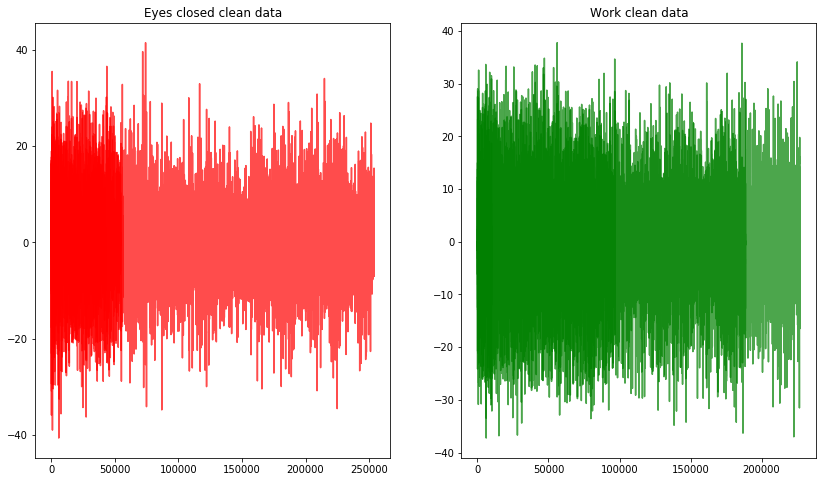

In [25]:
fig, ax = plt.subplots(1,2,figsize=(14,8))

for d in eyes_closed_data_clean:
    ax[0].plot(d.squeeze().reshape(-1),alpha=0.7,c='r')
    ax[0].set_title("Eyes closed clean data")
for d in work_data_clean:
    ax[1].plot(d.squeeze().reshape(-1),alpha=0.7,c='g')
    ax[1].set_title("Work clean data")
    

#plt.plot(out2.squeeze().reshape(-1), 'g', alpha=0.5)
#plt.plot(out3.squeeze().reshape(-1),alpha=0.4)

In [26]:
from features import *

In [27]:
eyes_closed_bandpower = []
work_bandpower = []
for o in eyes_closed_data_clean:
    bandp = []
    for d in o:
        bandp.append(get_bandpower(d.reshape(1,d.shape[0],d.shape[1])))
    eyes_closed_bandpower.append(np.array(bandp))
    
for o in work_data_clean:
    bandp = []
    for d in o:
        bandp.append(get_bandpower(d.reshape(1,d.shape[0],d.shape[1])))
    work_bandpower.append(np.array(bandp))

print(f"length of eyes closed bandpower list: {len(eyes_closed_bandpower)}")
print(f"length of work bandpower list: {len(work_bandpower)}")

/usr/lib/python3.7/site-packages/scipy/signal/spectral.py:1969: UserWarning: nperseg = 500 is greater than input length  = 250, using nperseg = 250
  .format(nperseg, input_length))


length of eyes closed bandpower list: 5
length of work bandpower list: 4


In [29]:
print("Shapes for bandpower eyes closed data:")
for d in eyes_closed_bandpower:
    print(d.shape)
    
print("Shapes of bandpower work data:")
for d in work_bandpower:
    print(d.shape)


Shapes for bandpower eyes closed data:
(218, 1, 5)
(171, 1, 5)
(1016, 1, 5)
(225, 1, 5)
(220, 1, 5)
Shapes of bandpower work data:
(909, 1, 5)
(40, 1, 5)
(388, 1, 5)
(755, 1, 5)


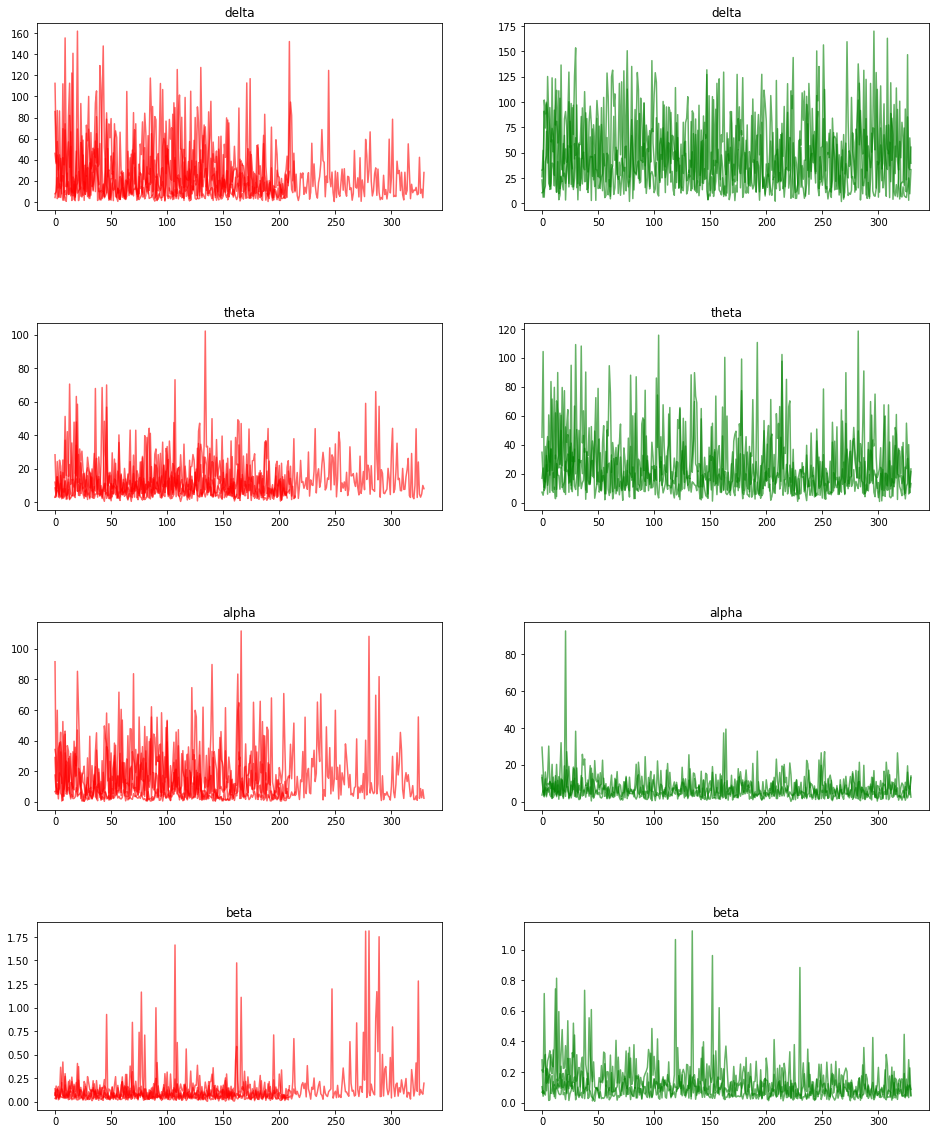

In [42]:
bands = ['delta','theta','alpha','beta']
fig,ax = plt.subplots(len(bands),2,figsize=(16,20))
fig.subplots_adjust(hspace=0.6)


for b in eyes_closed_bandpower:
    for i, a in enumerate(ax[:,0]):
        c = 'r'
        a.plot(b[10:340,:,i].reshape(-1), c=c, alpha=0.6)
        a.set_title(bands[i])

for b in work_bandpower:
    for i, a in enumerate(ax[:,1]):
        c = 'g'
        a.plot(b[10:340,:,i].reshape(-1), c=c, alpha=0.6)
        a.set_title(bands[i])

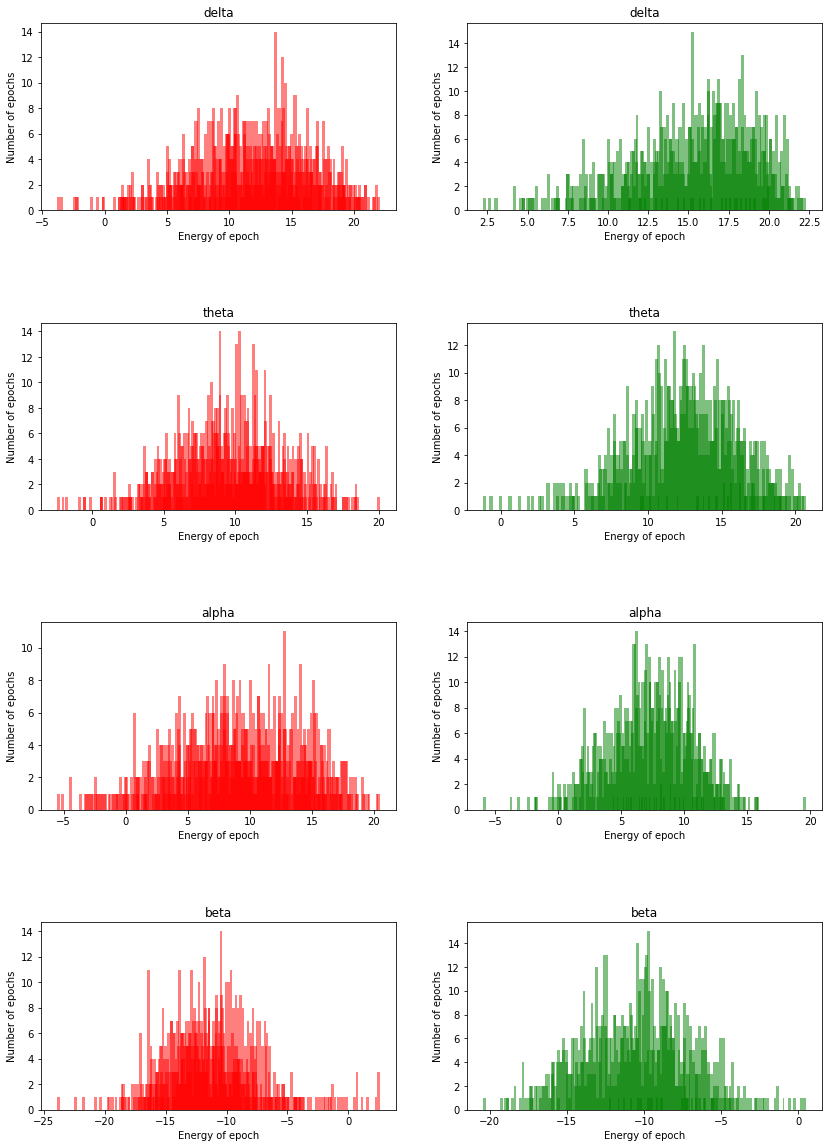

In [48]:
# Plot the histogram of bandpower to visualize the distribution of energy of each band
fig,ax = plt.subplots(len(bands),2,figsize=(14,20))
fig.subplots_adjust(hspace=0.6)

import numpy as np
for b in eyes_closed_bandpower:
    c = 'r'
    for i, a in enumerate(ax[:,0]):
        a.hist(10*np.log10(b[10:340,:,i].reshape(-1)), color=c,bins=100,
                       density=False, alpha=0.5)
        a.set_title(bands[i])
        a.set_xlabel('Energy of epoch')
        a.set_ylabel('Number of epochs')
        
for b in work_bandpower:
    c = 'g'
    for i, a in enumerate(ax[:,1]):
        a.hist(10*np.log10(b[10:340,:,i].reshape(-1)), color=c,bins=100,
                       density=False, alpha=0.5)
        a.set_title(bands[i])
        a.set_xlabel('Energy of epoch')
        a.set_ylabel('Number of epochs')

# Modeling
Let's model the bandpower of each epoch as a random variable with a certain probability distribution (pdf). We will model the pdf using a GMM. The GMM can be trained using the Expectation maximization method, available readily through scikit-learn.

In [53]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Convert each band into a one dimensional array
eyes_closed_theta = []
work_theta = []
band_ = 1
for b in eyes_closed_bandpower:
    eyes_closed_theta.append(b[:,0,band_])
    
for b in work_bandpower:
    work_theta.append(b[:,0,band_])


# Fit the GMM
eyes_closed_gmm_classifier = []
work_gmm_classifier = []
for b in eyes_closed_theta:
    eyes_closed_gmm_classifier.append(GaussianMixture(n_components=2).fit(20*np.log10(b.reshape(-1,1))))
    
for b in work_theta:
    work_gmm_classifier.append(GaussianMixture(n_components=2).fit(20*np.log10(b.reshape(-1,1))))

In [55]:
eyes_closed_bandpower[1].shape

(171, 1, 5)

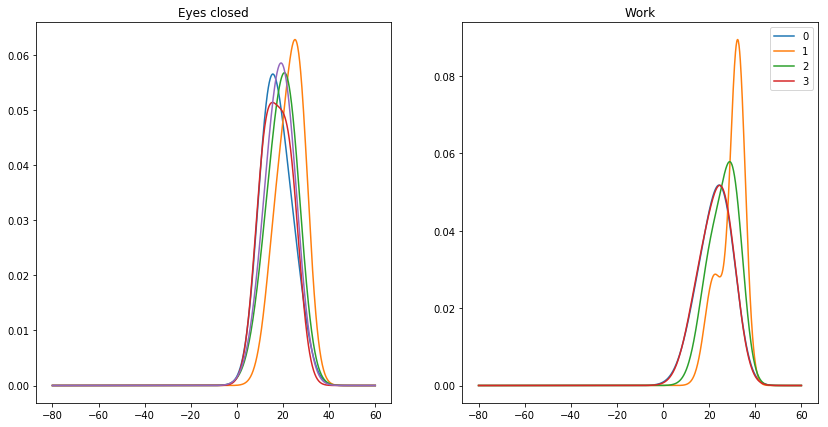

In [54]:
# Let's plot these GMMs
eyes_closed_y = []
work_y = []
x = np.linspace(-80, 60, 1000)
for g in eyes_closed_gmm_classifier:
    eyes_closed_y.append(np.exp(g.score_samples(x.reshape(-1,1))))
    
for g in work_gmm_classifier:
    work_y.append(np.exp(g.score_samples(x.reshape(-1,1))))

fig, ax = plt.subplots(1,2,figsize=(14,7))
for idx, _y in enumerate(eyes_closed_y):
    ax[0].plot(x,_y, label=str(idx))
    ax[0].set_title("Eyes closed")

for idx, _y in enumerate(work_y):
    ax[1].plot(x,_y, label=str(idx))
    ax[1].set_title("Work")

plt.legend()


In [61]:
eyes_closed_all = np.vstack(eyes_closed_bandpower)
work_all = np.vstack(work_bandpower)

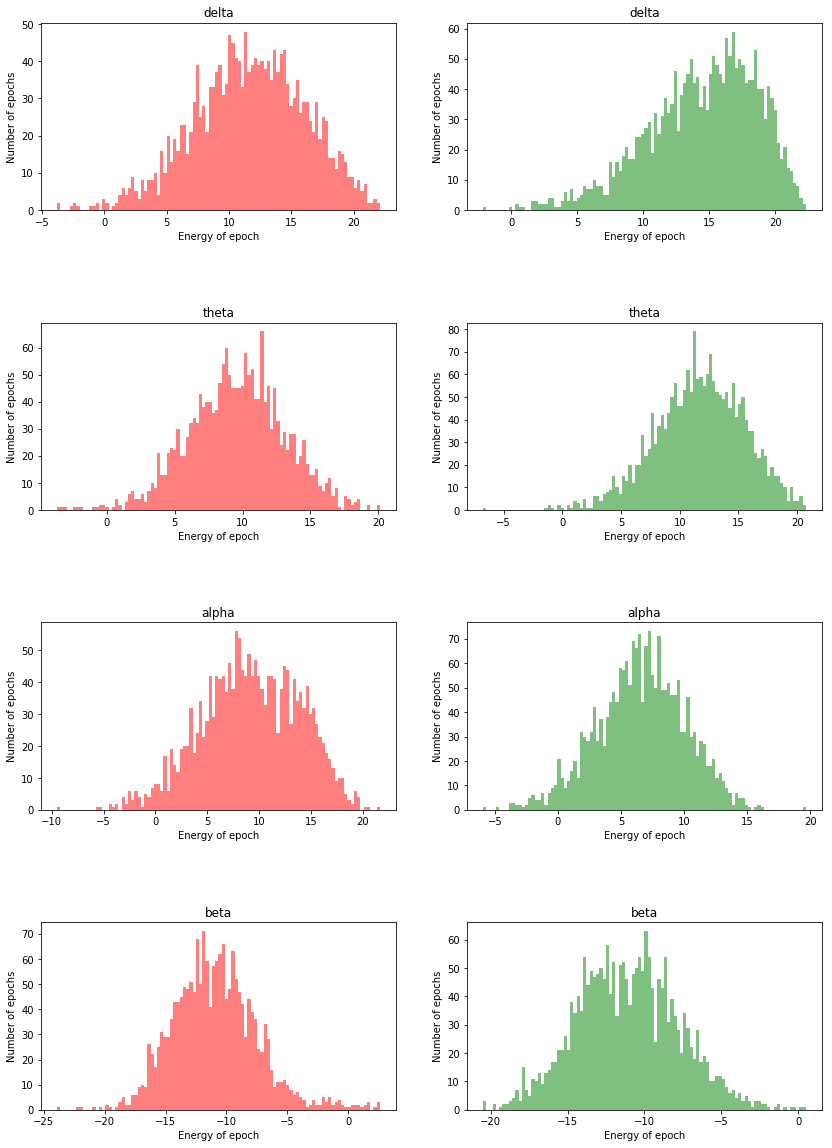

In [62]:
import numpy as np
c = 'r'
fig,ax = plt.subplots(len(bands),2,figsize=(14,20))
fig.subplots_adjust(hspace=0.6)

for i, a in enumerate(ax[:,0]):
    a.hist(10*np.log10(eyes_closed_all[10:,:,i].reshape(-1)), color=c,bins=100,
                   density=False, alpha=0.5)
    a.set_title(bands[i])
    a.set_xlabel('Energy of epoch')
    a.set_ylabel('Number of epochs')

c = 'g'
for i, a in enumerate(ax[:,1]):
    a.hist(10*np.log10(work_all[10:,:,i].reshape(-1)), color=c,bins=100,
                   density=False, alpha=0.5)
    a.set_title(bands[i])
    a.set_xlabel('Energy of epoch')
    a.set_ylabel('Number of epochs')

Shape of eyes_closed_theta_all: (1850,)
Shape of work_theta_all: (2092,)
Shape of eyes_closed_theta_all: (1850,)
Shape of work_theta_all: (2092,)
Shape of eyes_closed_theta_all: (1850,)
Shape of work_theta_all: (2092,)
Shape of eyes_closed_theta_all: (1850,)
Shape of work_theta_all: (2092,)


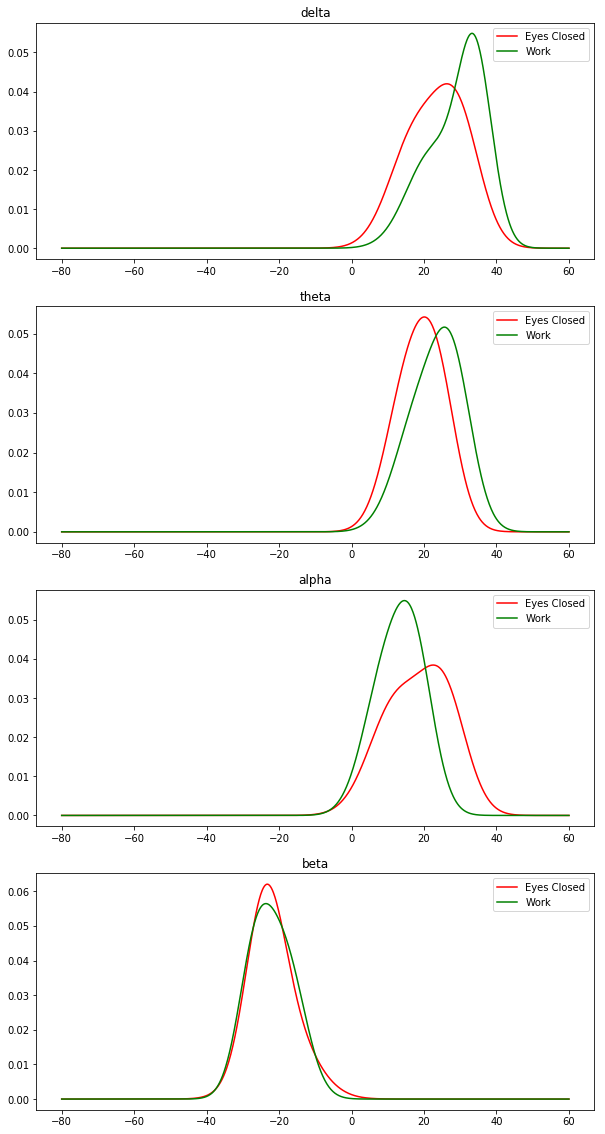

In [70]:
from sklearn.mixture import GaussianMixture
import numpy as np
fig,ax = plt.subplots(4,1,figsize=(10,20))

# Convert each band into a one dimensional array
for band_idx in range(4):
    eyes_closed_theta_all = []
    work_theta_all = []
    band_ = band_idx
    eyes_closed_theta_all = eyes_closed_all[:,0,band_]
    work_theta_all = work_all[:,0,band_]

    print(f"Shape of eyes_closed_theta_all: {eyes_closed_theta_all.shape}")
    print(f"Shape of work_theta_all: {work_theta_all.shape}")

    eyes_closed_gmm_classifier = GaussianMixture(n_components=2).fit(20*np.log10(eyes_closed_theta_all.reshape(-1,1)))
    work_gmm_classifier = GaussianMixture(n_components=2).fit(20*np.log10(work_theta_all.reshape(-1,1)))

    # Let's plot these GMMs
    x = np.linspace(-80, 60, 1000)
    eyes_closed_y = np.exp(eyes_closed_gmm_classifier.score_samples(x.reshape(-1,1)))
    work_y = np.exp(work_gmm_classifier.score_samples(x.reshape(-1,1)))

    ax[band_idx].plot(x,eyes_closed_y,c='r',label='Eyes Closed')
    ax[band_idx].plot(x,work_y,c='g',label='Work')
    ax[band_idx].set_title(bands[band_idx])
    ax[band_idx].legend()

